In [1]:
import talib as ta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

题目一： 
下载并用pandas导入sz50.xlsx的所有股票，索引设置为datetime，将所有票的keys打印出来。（提示：指定sheetname为None可以读取所有数据）

In [2]:
data = pd.read_excel('sz50.xlsx', sheet_name=None,index_col='datetime')
print(data.keys())

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


题目二：
读取data里的600036这只股票的DataFrame,将其收盘价转换成用Numpy的Array格式，并用talib计算10日均线值，返回ndarray的最后五个值
输出如下：

In [3]:
stock1_close = data["600036.XSHG"]['close'].values
stock1_close

array([ 69.31,  69.42,  69.85,  69.35,  69.23,  69.23,  69.27,  69.46,
        70.27,  71.62,  71.2 ,  71.74,  71.47,  71.66,  71.39,  72.78,
        72.86,  73.32,  72.2 ,  71.78,  71.7 ,  71.78,  72.36,  72.94,
        73.24,  72.78,  73.82,  73.82,  73.4 ,  74.94,  74.87,  74.9 ,
        74.79,  75.02,  74.98,  75.06,  74.67,  73.75,  73.32,  73.55,
        74.21,  74.52,  73.44,  72.94,  73.44,  73.67,  73.44,  73.55,
        72.94,  72.36,  72.36,  71.51,  71.97,  72.43,  73.67,  73.24,
        73.63,  73.4 ,  74.09,  73.63,  73.44,  72.97,  73.01,  73.36,
        73.51,  73.01,  72.63,  72.9 ,  71.78,  71.31,  70.93,  72.51,
        73.05,  73.17,  73.71,  73.24,  73.78,  73.36,  73.05,  72.36,
        72.51,  72.51,  72.47,  73.4 ,  74.33,  78.49,  79.8 ,  79.11,
        77.91,  78.15,  79.23,  80.62,  84.24,  84.55,  88.56,  87.37,
        86.52,  87.18,  85.52,  84.82,  84.63,  86.91,  87.75,  88.41,
        88.14,  86.79,  84.99,  83.52,  83.04,  84.44,  84.12,  85.03,
      

In [4]:
MA10 = ta.MA(stock1_close,10)
MA10_Array = np.array(MA10)
print(MA10_Array[-5:])

[108.35  108.741 109.176 110.102 111.666]


题目三： 将MA的ndarray数据转换成Series格式，并将价格和MA值用Matplotlib展示出来

In [5]:
MA10series = pd.Series(MA10_Array)
MA10series.index = data['600036.XSHG'].index

In [6]:
close = pd.Series(stock1_close)
close.index = data['600036.XSHG'].index

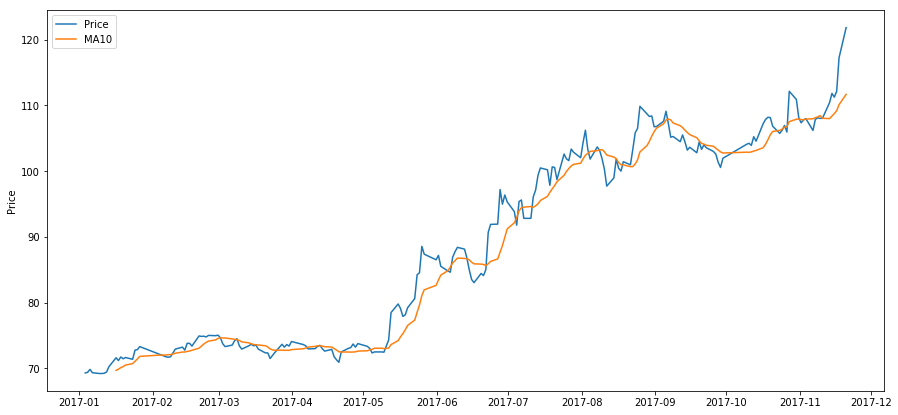

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(close)
plt.plot(MA10series)
plt.ylabel('Price')
plt.legend(['Price' ,'MA10'])
plt.show()


题目四： 用talib计算50只股票的周期为5的ROCR100，生成Dataframe，并将前5只股票的 ROCR100（参数timeperiod=20）用一张图显示出来。

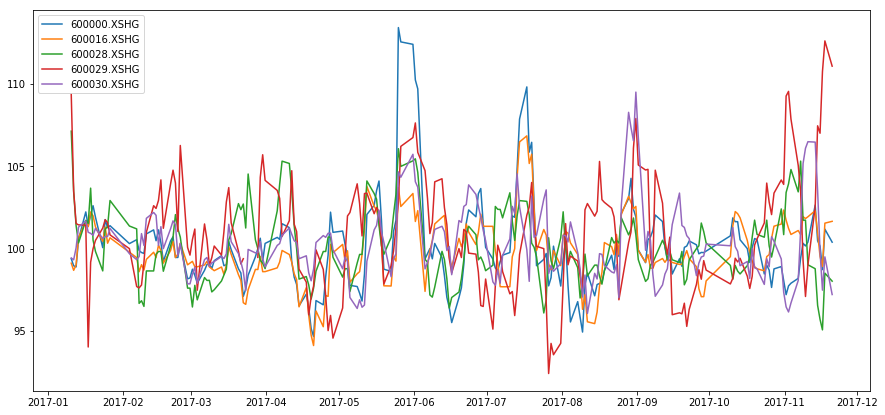

In [8]:
plt.figure(figsize=(15, 7))
ROCR100Dict = {}
for key in data.keys():
    try:
        closeArray = data[key].close.values
    except:
        continue
    ROCR100Array = ta.ROCR100(closeArray,5)
    ROCR100S = pd.Series(ROCR100Array)
    ROCR100S.index = data[key].index
    ROCR100Dict[key] = ROCR100S
ROCR100Dataframe = pd.DataFrame(ROCR100Dict)
title = pd.Series(ROCR100Dataframe.columns.values)
for i in range(5):
    plt.plot(ROCR100Dataframe[title.iloc[i]],label = title.iloc[i])
    plt.legend()
plt.show()